# Experience 1

### Importation des librairies utilisées

In [60]:
import os
import cartopy.crs as ccrs
import sys
import glob
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import xarray as xr
import pandas as pd
import seaborn as sns
from sqlalchemy import false

### Téléchargement des données

In [61]:
#Repertoire ou le fichier se trouve
path_file='C:/Users/useem/OneDrive - UQAM/08- Automne 2025/SCA5460 - Laboratoire 3/Experience 1/imerg_pr_201911_3h.nc4'

# Nom de la variable
var_name='precipitationCal'

# Pour lire le fichier
print('Reading file: ',path_file)
ds_i = xr.open_dataset(path_file)
ds_i.close()
print('Reading file: DONE')
precipitation = ds_i[var_name]
lons = ds_i['lon'].values
lats = ds_i['lat'].values

Reading file:  C:/Users/useem/OneDrive - UQAM/08- Automne 2025/SCA5460 - Laboratoire 3/Experience 1/imerg_pr_201911_3h.nc4
Reading file: DONE


## Kuala Lumpur

#### Série temporelle

Text(0.0, 1.0, 'a)')

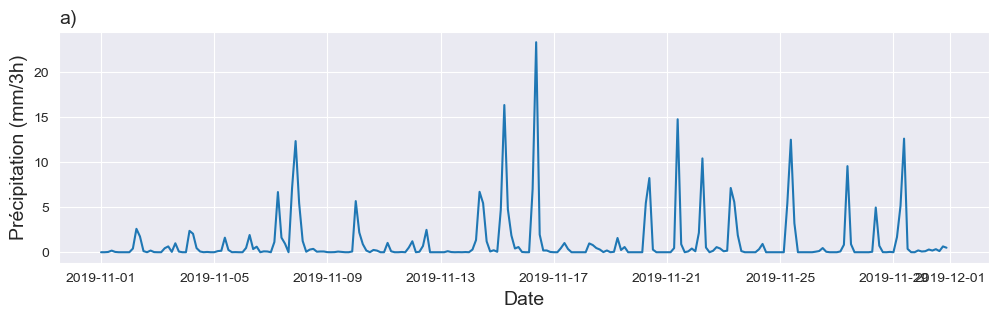

In [28]:
# Créé une liste avec les précipitations à la position selectionné au point de grille le plus proche
Serie_kuala = ds_i['precipitationCal'].sel(lat=3.1, lon=101.6, method='nearest').values
temps = ds_i['time']
#Création de la série temporelle
fig,ax = plt.subplots(figsize=(12,3))
ax.plot(temps,Serie_kuala)
ax.set_ylabel("Précipitation (mm/3h)",size=14)
ax.set_xlabel("Date",size=14)
ax.set_title("a)",size=14,loc='left') # ajout d'un titre pour identifier le graphique

### Accumulation totale de précipitation

In [71]:
Acum_Kuala= np.sum(Serie_kuala)

print("La quantité de précipitation:",Acum_Kuala)

0.0
La quantité de précipitation: 277.08072


### Fréquence de précipitation

In [85]:
f_k=0
l=0
for i in Serie_kuala:
    l=l+1
    if i>0:
        f_k=f_k+1

print("Le nombre de mesures ayant un taux de précipitation supérieure a 0mm est de",f_k)
Frequence_Kuala = f_k/l
print("La fréquence de précipitation:",Frequence_Kuala)

Le nombre de mesures ayant un taux de précipitation supérieure a 0mm est de 167
La fréquence de précipitation: 0.6958333333333333


### Précipitation moyenne

In [90]:
moyenne_k= Serie_kuala.mean()
print("La moyenne des precipitation est de",moyenne_k)
Serie_Sans_Zero=np.where(Serie_kuala==0,np.nan,Serie_kuala)
int_moyenne_K= np.nanmean(Serie_Sans_Zero)
print("L'intensité de précipitation moyenne est de",int_moyenne_K)

La moyenne des precipitation est de 1.154503
L'intensité de précipitation moyenne est de 1.659166


### Durée maximale des événements de précipitation

In [110]:
Max=0
N=0
for i in range(0,len(Serie_kuala)):
    if Serie_kuala[i]>0:
        N=N+1
    else:
        N=0

    if Max<N:
        Max=N
NbrHeure=Max*3
print("La durée maximal d'un evenement est de",NbrHeure,"heures")

La durée maximal d'un evenement est de 45 heures


### Valeur maximale du taux de précipitation

In [96]:
val_max_K= np.max(Serie_kuala)
print("La valeur maximale du taux de précipitation est de",val_max_K)

La valeur maximale du taux de précipitation est de 23.248617


## Montréal

### Série temporelle

Text(0.0, 1.0, 'b)')

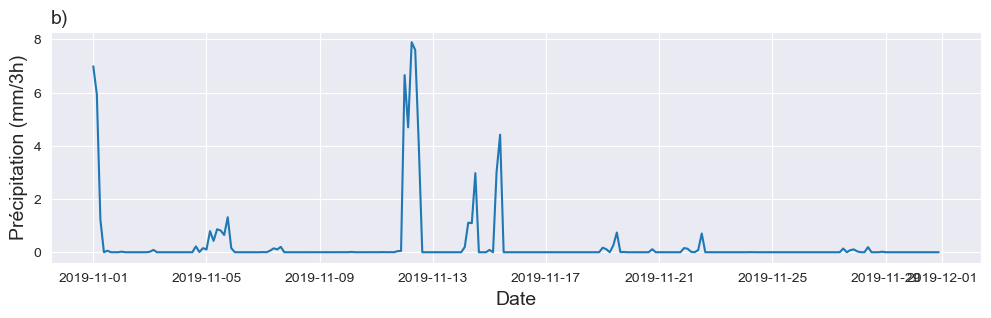

In [29]:
# Créé une liste avec les précipitations à la position selectionné au point de grille le plus proche
lat_mtl=45.5
lon_mtl=-73.5
Serie_Montreal = ds_i['precipitationCal'].sel(lat=lat_mtl, lon=lon_mtl, method='nearest').values
#Création de la série temporelle
fig,ax = plt.subplots(figsize=(12,3))
ax.plot(temps,Serie_Montreal)
ax.set_ylabel("Précipitation (mm/3h)",size=14)
ax.set_xlabel("Date",size=14)
ax.set_title("b)",size=14,loc='left') # ajout d'un titre pour identifier le graphique

### Acumulation totale de précipitation

In [62]:
Acum_MTL= np.sum(Serie_Montreal)
print("La quantité de précipitation:",Acum_MTL)

La quantité de précipitation: 67.31239


### Fréquence de précipitation

In [78]:
f_m = 0
l = 0
for i in Serie_Montreal:
    l = l + 1
    if i > 0:
        f_m = f_m + 1

print("Le nombre de mesures ayant un taux de précipitation supérieure a 0mm est de", f_m)
Frequence_Kuala = f_m/l
print("La fréquence de précipitation:", Frequence_Kuala)

Le nombre de mesures ayant un taux de précipitation supérieure a 0mm est de 64
La fréquence de précipitation: 0.26666666666666666


### Précipitation moyenne

In [94]:
moyenne_M= Serie_Montreal.mean()
print("La moyenne des precipitation est de",moyenne_M)
Serie_Sans_Zero_M=np.where(Serie_Montreal==0,np.nan,Serie_Montreal)
int_moyenne_M= np.nanmean(Serie_Sans_Zero_M)
print("L'intensité de précipitation moyenne est de",int_moyenne_K)

La moyenne des precipitation est de 0.2804683
L'intensité de précipitation moyenne est de 1.659166


### Durée maximale des événements de précipitation

In [109]:
Max=0
N=0
for i in range(0,len(Serie_Montreal)):
    if Serie_Montreal[i]>0:
        N=N+1
    else:
        N=0

    if Max<N:
        Max=N
NbrHeure=Max*3
print("La durée maximal d'un evenement est de",NbrHeure,"heures")

La durée maximal d'un evenement est de 33 heures


### Valeur maximale du taux de précipitation

In [98]:
val_max_M= np.max(Serie_Montreal)
print("La valeur maximale du taux de précipitation est de",val_max_M)

La valeur maximale du taux de précipitation est de 7.8899417


## Point océanique

### Série temporelle

Text(0.0, 1.0, 'c)')

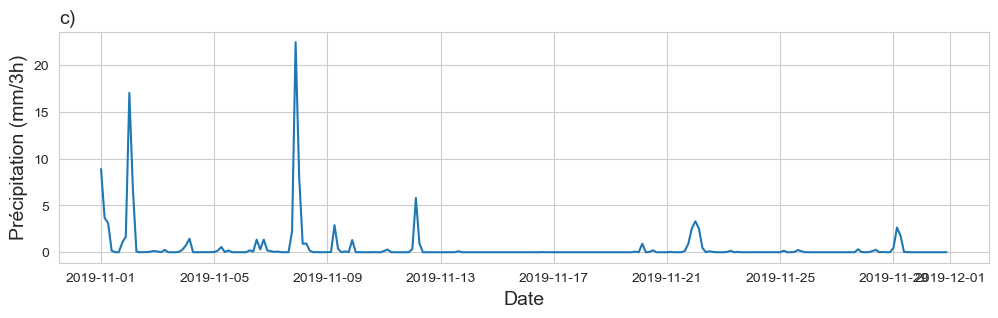

In [61]:
# Créé une liste avec les précipitations à la position selectionné au point de grille le plus proche.
Serie_oceanique = ds_i['precipitationCal'].sel(lat=5, lon=106, method='nearest').values
temps = ds_i['time']
#Création de la série temporelle
fig,ax = plt.subplots(figsize=(12,3))
ax.plot(temps,Serie_oceanique)
ax.set_ylabel("Précipitation (mm/3h)",size=14)
ax.set_xlabel("Date",size=14)
ax.set_title("c)",size=14,loc='left') # ajout d'un titre pour identifier le graphique

### Acumulation totale de précipitation

In [63]:
Acum_Ocean= np.sum(Serie_oceanique)
print("La quantité de précipitation:",Acum_Ocean)

La quantité de précipitation: 114.86565


### Fréquence de précipitation

In [79]:
### Fréquence de précipitation
f_o = 0
l = 0
for i in Serie_oceanique:
    l = l + 1
    if i > 0:
        f_o = f_o + 1

print("Le nombre de mesures ayant un taux de précipitation supérieure a 0mm est de", f_o)
Frequence_Kuala = f_o / l
print("La fréquence de précipitation:", Frequence_Kuala)

Le nombre de mesures ayant un taux de précipitation supérieure a 0mm est de 97
La fréquence de précipitation: 0.4041666666666667


### Précipitation moyenne

In [93]:
moyenne_O= Serie_oceanique.mean()
print("La moyenne des precipitation est de",moyenne_O)
Serie_Sans_Zero_O=np.where(Serie_oceanique==0,np.nan,Serie_oceanique)
int_moyenne_O= np.nanmean(Serie_Sans_Zero_O)
print("L'intensité de précipitation moyenne est de",int_moyenne_O)

La moyenne des precipitation est de 0.47860685
L'intensité de précipitation moyenne est de 1.1841819


### Durée maximale des événements de précipitation

In [108]:
Max=0
N=0
for i in range(0,len(Serie_oceanique)):
    if Serie_oceanique[i]>0:
        N=N+1
    else:
        N=0

    if Max<N:
        Max=N
NbrHeure=Max*3
print("La durée maximal d'un evenement est de",NbrHeure,"heures")

La durée maximal d'un evenement est de 30 heures


### Valeur maximale du taux de précipitation

In [99]:
val_max_O = np.max(Serie_oceanique)
print("La valeur maximale du taux de précipitation est de",val_max_O)

La valeur maximale du taux de précipitation est de 22.457836


## Série temporelle ...

### Série temporelle

Text(0.0, 1.0, 'd)')

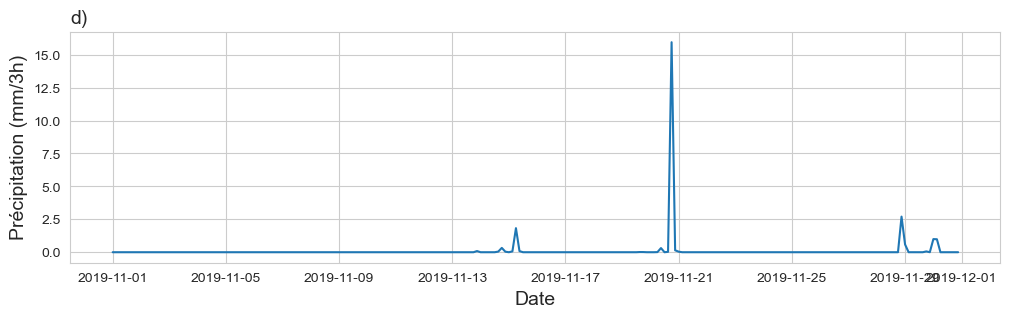

In [59]:
# Créé une liste avec les précipitations à la position selectionné au point de grille le plus proche
Serie = ds_i['precipitationCal'].sel(lat=37.19, lon=-116.29, method='nearest').values
temps = ds_i['time']
#Création de la série temporelle
fig,ax = plt.subplots(figsize=(12,3))
ax.plot(temps,Serie)
ax.set_ylabel("Précipitation (mm/3h)",size=14)
ax.set_xlabel("Date",size=14)
ax.set_title("d)",size=14,loc='left') # ajout d'un titre pour identifier le graphique

### Acumulation totale de précipitation

In [64]:
Acum_1= np.sum(Serie)
print("La quantité de précipitation:",Acum_1)

La quantité de précipitation: 24.344086


### Fréquence de précipitation

In [80]:
### Fréquence de précipitation
f_1 = 0
l = 0
for i in Serie:
    l = l + 1
    if i > 0:
        f_1 = f_1 + 1

print("Le nombre de mesures ayant un taux de précipitation supérieure a 0mm est de", f_1)
Frequence_Kuala = f_1 / l
print("La fréquence de précipitation:", Frequence_Kuala)

Le nombre de mesures ayant un taux de précipitation supérieure a 0mm est de 26
La fréquence de précipitation: 0.10833333333333334


### Précipitation moyenne

In [95]:
moyenne_1= Serie.mean()
print("La moyenne des precipitation est de",moyenne_1)
Serie_Sans_Zero_1=np.where(Serie==0,np.nan,Serie)
int_moyenne_1= np.nanmean(Serie_Sans_Zero_1)
print("L'intensité de précipitation moyenne est de",int_moyenne_1)

La moyenne des precipitation est de 0.10143369
L'intensité de précipitation moyenne est de 0.936311


### Durée maximale des événements de précipitation

In [107]:
Max=0
N=0
for i in range(0,len(Serie)):
    if Serie[i]>0:
        N=N+1
    else:
        N=0

    if Max<N:
        Max=N
NbrHeure=Max*3
print("La durée maximal d'un evenement est de",NbrHeure,"heures")

La durée maximal d'un evenement est de 12 heures


### Valeur maximale du taux de précipitation

In [100]:
val_max_1= np.max(Serie)
print("La valeur maximale du taux de précipitation est de",val_max_1)

La valeur maximale du taux de précipitation est de 15.950165


### Calcul de la corrélation temporelle

# Analyses spatiales

### Graphique de distribution spatiale du taux de précipitation

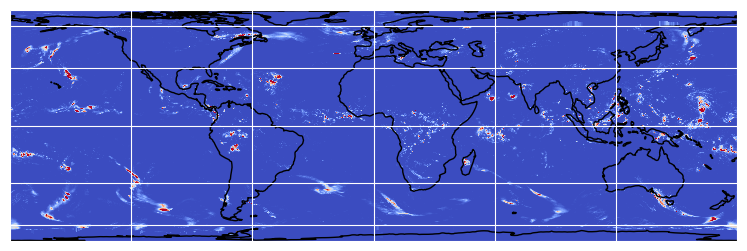

In [64]:
date = np.datetime64('2019-11-01T12:00:00.000000')
x,y=np.meshgrid(lons, lats)
Serie_12novembre = ds_i['precipitationCal'].sel(time=date, method='nearest').values

plt.figure(figsize=(9.42477796077, 3))
ax = plt.axes(projection=ccrs.LambertCylindrical())
ax.coastlines(resolution='110m')
ax.gridlines()
ax.pcolormesh(x,y,Serie_12novembre,vmin=0,vmax=20,transform=ccrs.PlateCarree(),shading='nearest',cmap='coolwarm')
plt.savefig('distrib_1nov.png')

### Histogramme logarithmique

C:\Users\useem\AppData\Local\Temp\ipykernel_1996\512819271.py:12: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


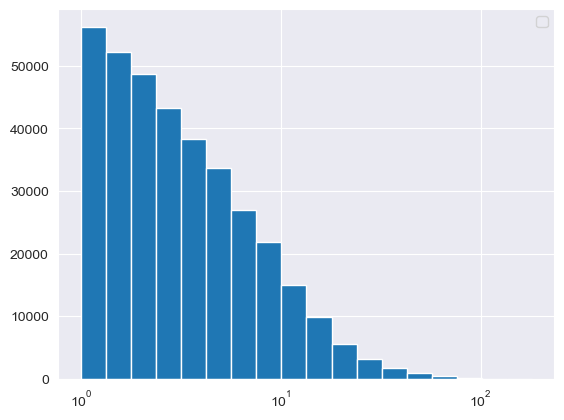

<Figure size 640x480 with 0 Axes>

In [65]:
zero=Serie_12novembre[Serie_12novembre==0]
positives = Serie_12novembre[Serie_12novembre>=0]
bin = 19
min_val = np.min(positives)
max_val = np.max(positives)
logbins = np.logspace(0, np.log10(max_val), bin)

# Histogramme positif
plt.hist(positives, bins=logbins)
plt.xticks(logbins)
plt.xscale("log")
plt.show()
plt.savefig('histopremiernov.png')

### graphique que montre la distribution spatiale du taux de précipitation moyenné sur tout le mois

In [24]:
debut = np.datetime64('2019-11-01T12:00:00.000000') # debut de la serie
fin = np.datetime64('2019-11-30T12:21:00.000000') # fin de la serie
x,y=np.meshgrid(lons, lats)

Serie_nov = ds_i['precipitationCal'].sel(time=slice(debut, fin))
Serie_nov_moyenne=Serie_nov.mean(dim='time')


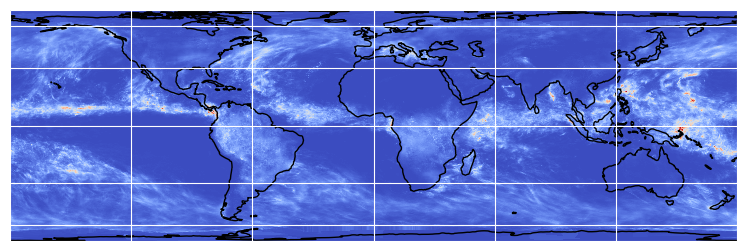

In [26]:
plt.figure(figsize=(9.42477796077, 3))
ax = plt.axes(projection=ccrs.LambertCylindrical())
ax.coastlines(resolution='110m')
ax.gridlines()
ax.pcolormesh(x,y,Serie_nov_moyenne,vmin=0,vmax=5,transform=ccrs.PlateCarree(),shading='nearest',cmap='coolwarm')

### Histogramme de la série moyenné

###  un graphique de la distribution spatiale du taux de précipitation de Montréal

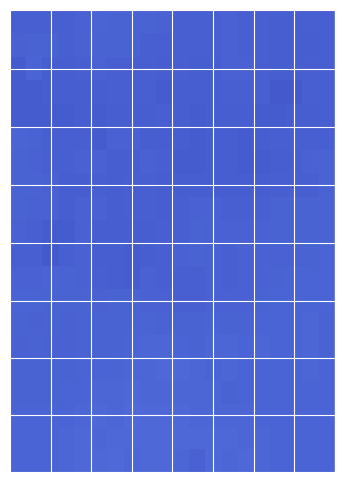

In [59]:
plt.figure(figsize=(6, 6))
ax = plt.axes(projection=ccrs.Mercator(central_longitude=lat_mtl))
ax.set_extent([lon_mtl - 1, lon_mtl + 1, lat_mtl - 1, lat_mtl + 1], crs=ccrs.PlateCarree())
ax.coastlines(resolution='110m')
ax.gridlines()
ax.pcolormesh(x,y,Serie_nov_moyenne,vmin=0,vmax=5,transform=ccrs.PlateCarree(),shading='nearest',cmap='coolwarm')

###  un graphique de la distribution spatiale du taux de précipitation de Montréal

In [57]:
plt.figure(figsize=(6, 6))
ax = plt.axes(projection=ccrs.Mercator(central_longitude=lat_mtl))
ax.set_extent([lon_mtl - 1, lon_mtl + 1, lat_mtl - 1, lat_mtl + 1], crs=ccrs.PlateCarree())
ax.coastlines(resolution='110m')
ax.gridlines()
ax.contourf(x,y,Serie_nov_moyenne,vmin=0,vmax=5,transform=ccrs.PlateCarree())

KeyboardInterrupt: 

Error in callback <function _draw_all_if_interactive at 0x0000013F77298A40> (for post_execute), with arguments args (),kwargs {}:


KeyboardInterrupt: 

Error in callback <function flush_figures at 0x0000013F23FF2520> (for post_execute), with arguments args (),kwargs {}:


KeyboardInterrupt: 